In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/joaramirezcu/Mineria_Proyecto/master/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
data_f1 = pd.read_csv(url, error_bad_lines=False)
data_f1=data_f1.drop(['rerun'], axis=1)
data_f1.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
dim=display(data_f1.shape)

(10000, 17)

In [ ]:
X = data_f1.iloc[:, [3,4,5,6,7]]
Y = data_f1.iloc[:, [12]]
Y = Y.replace({"GALAXY":0, "STAR":1,"QSO":2})
print(X.head())

          u         g         r         i         z
0  19.47406  17.04240  15.94699  15.50342  15.22531
1  18.66280  17.21449  16.67637  16.48922  16.39150
2  19.38298  18.19169  17.47428  17.08732  16.80125
3  17.76536  16.60272  16.16116  15.98233  15.90438
4  17.55025  16.26342  16.43869  16.55492  16.61326


0    4998
1    4152
2     850
Name: class, dtype: int64


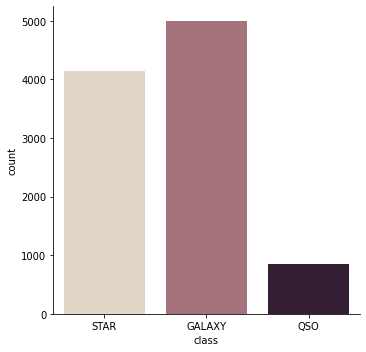

In [ ]:
sns.catplot(x="class", kind="count", palette="ch:.25", data=data_f1);
print(Y["class"].value_counts())

In [ ]:
correlation_dat = X.corr()
correlation_dat.style.background_gradient(cmap='coolwarm', axis=None)

,u,g,r,i,z
u,1.000000,0.849232,0.692379,0.602630,0.551483
g,0.849232,1.000000,0.958106,0.907419,0.879622
r,0.692379,0.958106,1.000000,0.977672,0.969197
i,0.602630,0.907419,0.977672,1.000000,0.981507
z,0.551483,0.879622,0.969197,0.981507,1.000000


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.preprocessing import StandardScaler

In [ ]:
y = to_categorical(Y)
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_trainT , X_test ,Y_trainT, Y_test = train_test_split(X_std , y , test_size=0.2)
X_train , X_test10 ,Y_train, Y_test10 = train_test_split(X_trainT , Y_trainT , test_size=0.125)

In [ ]:
input_size = 5
num_labels = 3
batch_size = 128
dropout = 0.45

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Dense(5, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1536      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

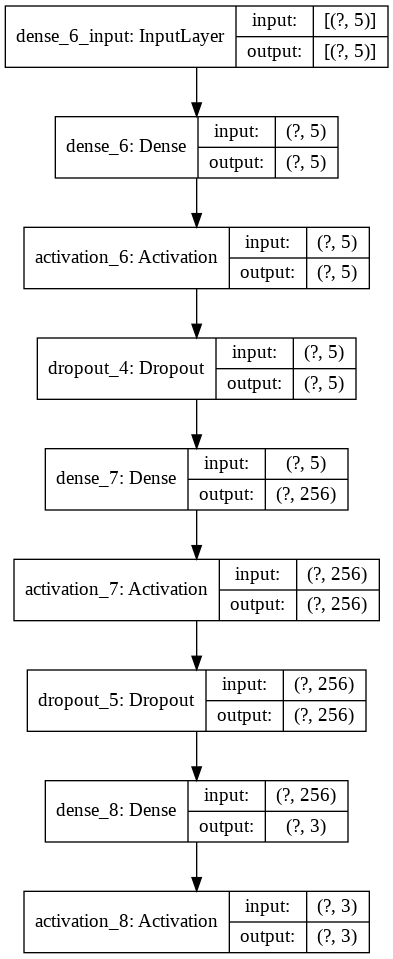

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import backend as K

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 0.99 accuracy so cancelling training!")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = myCallback()

In [ ]:
# Directory where the checkpoints will be saved
import os 
checkpoint_dir = './training_checkpoints_mnist_mlp'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "mnist_mlp_ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True, 
    monitor='val_accuracy', mode='max',
    save_best_only=True)

In [ ]:
epochs = 50
validation_size =0.2

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_size,
                    callbacks=[accu_callback,checkpoint_callback],
                    verbose=2)

Epoch 1/50
44/44 - 0s - loss: 0.9785 - accuracy: 0.5954 - val_loss: 0.8392 - val_accuracy: 0.7550
Epoch 2/50
44/44 - 0s - loss: 0.8210 - accuracy: 0.6827 - val_loss: 0.6851 - val_accuracy: 0.7450
Epoch 3/50
44/44 - 0s - loss: 0.7363 - accuracy: 0.7163 - val_loss: 0.5755 - val_accuracy: 0.8150
Epoch 4/50
44/44 - 0s - loss: 0.6806 - accuracy: 0.7407 - val_loss: 0.5235 - val_accuracy: 0.8357
Epoch 5/50
44/44 - 0s - loss: 0.6334 - accuracy: 0.7582 - val_loss: 0.4846 - val_accuracy: 0.8571
Epoch 6/50
44/44 - 0s - loss: 0.6239 - accuracy: 0.7598 - val_loss: 0.4688 - val_accuracy: 0.8657
Epoch 7/50
44/44 - 0s - loss: 0.6268 - accuracy: 0.7661 - val_loss: 0.4608 - val_accuracy: 0.8671
Epoch 8/50
44/44 - 0s - loss: 0.5965 - accuracy: 0.7746 - val_loss: 0.4515 - val_accuracy: 0.8600
Epoch 9/50
44/44 - 0s - loss: 0.5901 - accuracy: 0.7809 - val_loss: 0.4293 - val_accuracy: 0.8857
Epoch 10/50
44/44 - 0s - loss: 0.5938 - accuracy: 0.7789 - val_loss: 0.4252 - val_accuracy: 0.8807
Epoch 11/50
44/44 -

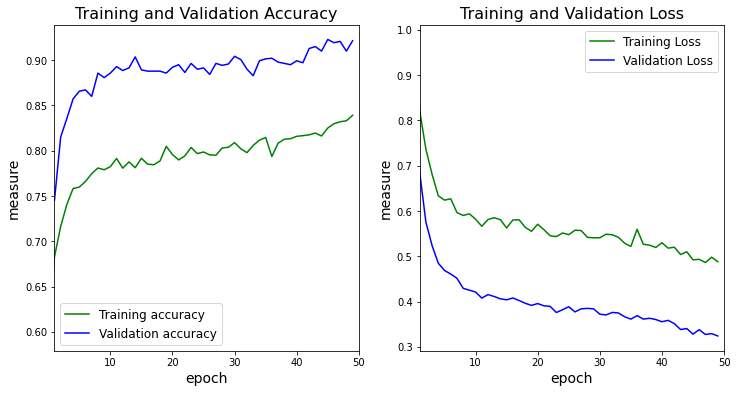

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(12,6))


ax[0].plot(epochs, acc, 'r', label='Training accuracy', color = 'green')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss', color = 'green')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

In [ ]:
#validate the model on test dataset to determine generalization
loss, acc = model.evaluate(X_test, 
                        Y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (loss))


Test accuracy: 90.7%

Test loss: 0.4%


In [ ]:
#validate the model on test dataset to determine generalization
loss, acc = model.evaluate(X_test10, 
                        Y_test10,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (loss))


Test accuracy: 90.8%

Test loss: 0.3%
